In [1]:
# importing packages
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import seaborn as sns 
from itertools import combinations
import numpy as np
import random

# model construction
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# model evaluation
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, precision_recall_curve
from sklearn import metrics

# set random seed
random.seed(10)

In [2]:
# setting the style
plt.style.use('seaborn-whitegrid')

# setting the annotation default font 
plt.rcParams["font.family"] = "roboto"
plt.rcParams["font.size"] = 10

plt.rcParams["figure.autolayout"] = False


plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = False

# define function to generate custom color maps
#define color map
def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))
def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]
def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp




In [5]:
df = pd.read_csv("data.csv", index_col = ['CensusTract'])
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()


,State,County,LILATracts_1And10,Urban,DP03_0006PE,DP03_0088E,DP03_0119PE,DP02_0006PE,P001003PE,P001004PE,P001005PE,P001006PE,P001007PE,P001008PE,P001009PE,DP03_UNEMPLOY,H004002PE,H004003PE,H004004PE
CensusTract,,,,,,,,,,,,,,,,,,,
1001020100,AL,Autauga,0,1,1.5,35830.0,5.0,4.6,84.832636,11.349372,0.732218,0.732218,0.000000,0.732218,1.621339,3.724928,53.391053,23.953824,22.655123
1001020200,AL,Autauga,0,1,2.6,18520.0,10.7,2.1,40.921659,56.082949,0.230415,0.230415,0.000000,1.244240,1.290323,7.601351,45.356662,17.765814,36.877524
1001020300,AL,Autauga,0,1,1.3,20319.0,4.5,4.1,76.371183,19.181737,0.326119,0.504002,0.148236,1.037652,2.431070,5.573248,57.722930,17.834395,24.442675
1001020400,AL,Autauga,0,1,1.4,25375.0,4.9,3.5,93.160055,4.400365,0.250798,0.410397,0.091199,0.501596,1.185591,4.397394,49.535424,29.268293,21.196283
1001020500,AL,Autauga,0,1,3.9,28102.0,3.9,5.1,80.494148,13.347576,0.445848,2.749396,0.083597,0.835965,2.043470,3.453039,49.069084,11.170995,39.759922


In [6]:
# define function to return accuracy, specificity, sensitivity
def evaluation_score(y_test, y_pred_proba, thresh = 0.5):
    y_pred = [1 if x >= thresh else 0  for x in y_pred_proba]
    cm      = confusion_matrix(y_test,y_pred)
    n       = cm[0,0] + cm[1,0] + cm[0,1] + cm[1,1]
    tp      = cm[1,1]
    tn      = cm[0,0]
    fn      = cm[1,0]
    fp      = cm[0,1]
    acc     = (tp+tn)/n
    spe     = tn / (tn + fp)
    sen     = tp / (tp + fn)
    print("Accuracy:{:.2f}, Specifity:{:.2f} ,Sensitivity:{:.2f}".format(acc,spe,sen))
    return acc, spe,sen, cm


## Train Test Split

In [7]:
X = df.iloc[:,3:]
y = df['LILATracts_1And10']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.5, random_state=42)


## Logistic Regression: Model Construction

### Logistic Regression: Model Construction

Optimization terminated successfully.
         Current function value: 0.685188
         Iterations 7
Predictors:DP03_0006PE
Accuracy:0.31, Specifity:0.24 ,Sensitivity:0.78
0.5101881627765615
Optimization terminated successfully.
         Current function value: 0.326134
         Iterations 6
Predictors:DP03_0088E
Accuracy:0.88, Specifity:1.00 ,Sensitivity:0.00
0.7809119586828546
Optimization terminated successfully.
         Current function value: 0.593001
         Iterations 6
Predictors:DP03_0119PE
Accuracy:0.82, Specifity:0.94 ,Sensitivity:0.01
0.23119277911592334
Optimization terminated successfully.
         Current function value: 0.491362
         Iterations 6
Predictors:DP02_0006PE
Accuracy:0.84, Specifity:0.95 ,Sensitivity:0.04
0.41383283329148135
Optimization terminated successfully.
         Current function value: 0.377645
         Iterations 6
Predictors:P001003PE
Accuracy:0.88, Specifity:1.00 ,Sensitivity:0.00
0.6104198627349141
Optimization terminated successfully.
   

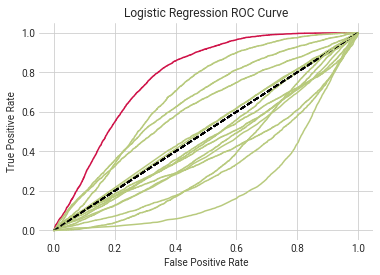

In [8]:
variables = df.columns[4:]
#combs = combinations(variables, 8)
#combs = [list(x) for x in list(combs)]

for var in variables:
    # reshape for 1 dimension predictor
    x_train = np.array(X_train[var]).reshape(-1,1)
    x_test  = np.array(X_test[var]).reshape(-1,1)
   
    log_model = sm.Logit(endog = y_train, exog = x_train).fit(maxiter = 10000)
    y_pred_proba = log_model.predict(x_test)

    # model evaluation
    print("Predictors:{}".format(str(var)))
    log_model_acc,log_model_spe ,log_model_sen, cm  = evaluation_score(y_test, y_pred_proba, thresh = 0.5)
    pre, rec, thresholds = precision_recall_curve(y_test, y_pred_proba)
    print(metrics.auc(fpr, tpr))

    # color to customise the plot
    if var == "DP03_0088E":
        color = "#CF1248"
    else:
        color = '#b8ca7d'
    
    # plotting the ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Logistic Regression',color = color)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression ROC Curve')

plt.savefig("log_1var.png",dpi = 300, transparent = True)


In [78]:
# running the optimal model for a summary table
x_train = np.array(X_train["DP03_0088E"]).reshape(-1,1)
x_test  = np.array(X_test["DP03_0088E"]).reshape(-1,1)

log_model = sm.Logit(endog = y_train, exog = x_train).fit(maxiter = 10000)

# model evaluation
y_pred_proba = log_model.predict(x_test)


print("Predictors:{}".format(str(var)))
log_model_acc,log_model_spe ,log_model_sen, cm  = evaluation_score(y_test, y_pred_proba, thresh = 0.25)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print(metrics.auc(fpr, tpr))


Optimization terminated successfully.
         Current function value: 0.326134
         Iterations 6
Predictors:['DP03_0088E', 'DP03_0119PE', 'P001008PE', 'P001006PE', 'H004002PE', 'P001009PE', 'H004004PE', 'DP03_0006PE', 'DP03_UNEMPLOY']
Accuracy:0.85, Specifity:0.95 ,Sensitivity:0.14
0.7809119586828546


In [79]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      LILATracts_1And10   No. Observations:                35821
Model:                          Logit   Df Residuals:                    35820
Method:                           MLE   Df Model:                            0
Date:                Mon, 18 Apr 2022   Pseudo R-squ.:                  0.1304
Time:                        00:05:53   Log-Likelihood:                -11682.
converged:                       True   LL-Null:                       -13435.
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -8.84e-05   7.86e-07   -112.477      0.000   -8.99e-05   -8.69e-05
==============================================================================
"""

### Forward Stepwise Selection
Now that we have established the most important predictor is "DP03_0088E" (poverty rate), we then attempt to build more complex models using *forward stepwise* method.

In [9]:
predictors = ['DP03_0088E']
variables = df.columns[[4,6,7,8,9,10,11,12,13,14,15,16,17,18]]

forward_stepwise = pd.DataFrame({"No. Variables":1,"Predictors":predictors,'AUC':0.7809119586828546})

#initialise empty dataframe to find the best additional variable
for m in range(0,14):
        auc_k = pd.DataFrame(columns = ["predictors","AUC"])
        for x in range(0,len(variables)):
            new_pred = predictors + [variables[x]]
            x_train = X_train[new_pred]
            x_test = X_test[new_pred]

            log_model = sm.Logit(endog = y_train, exog = x_train).fit(maxiter = 10000)
            
            # model evaluation
            y_pred_proba = log_model.predict(x_test)
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
            auc_k = auc_k.append({"predictors":new_pred, "AUC":metrics.auc(fpr, tpr)}, ignore_index = True)
            print("complete: " + str(new_pred))

        n_best = auc_k.loc[auc_k['AUC'].idxmax()]['predictors']
        auc = auc_k['AUC'].max()
        forward_stepwise = forward_stepwise.append({"No. Variables":m+2,"Predictors":n_best,"AUC": auc},ignore_index = True)

        # Redefine variables and predictors for next additional predictor
        variables = list(set(variables) - set(n_best))      # redefine the list of potential predictors
        predictors = n_best                                 # redefine the baseline predictors
    


Optimization terminated successfully.
         Current function value: 0.325900
         Iterations 6
complete: ['DP03_0088E', 'DP03_0006PE']
Optimization terminated successfully.
         Current function value: 0.323016
         Iterations 7
complete: ['DP03_0088E', 'DP03_0119PE']
Optimization terminated successfully.
         Current function value: 0.325539
         Iterations 7
complete: ['DP03_0088E', 'DP02_0006PE']
Optimization terminated successfully.
         Current function value: 0.324618
         Iterations 7
complete: ['DP03_0088E', 'P001003PE']
Optimization terminated successfully.
         Current function value: 0.324684
         Iterations 7
complete: ['DP03_0088E', 'P001004PE']
Optimization terminated successfully.
         Current function value: 0.324675
         Iterations 7
complete: ['DP03_0088E', 'P001005PE']
Optimization terminated successfully.
         Current function value: 0.324413
         Iterations 7
complete: ['DP03_0088E', 'P001006PE']
Optimization t

In [11]:
forward_stepwise

,No. Variables,Predictors,AUC
0,1,DP03_0088E,0.780912
1,2,"[DP03_0088E, DP03_0119PE]",0.786958
2,3,"[DP03_0088E, DP03_0119PE, P001008PE]",0.795891
3,4,"[DP03_0088E, DP03_0119PE, P001008PE, P001006PE]",0.797476
4,5,"[DP03_0088E, DP03_0119PE, P001008PE, P001006PE...",0.798956
5,6,"[DP03_0088E, DP03_0119PE, P001008PE, P001006PE...",0.799276
6,7,"[DP03_0088E, DP03_0119PE, P001008PE, P001006PE...",0.800259
7,8,"[DP03_0088E, DP03_0119PE, P001008PE, P001006PE...",0.800422
8,9,"[DP03_0088E, DP03_0119PE, P001008PE, P001006PE...",0.800509
9,10,"[DP03_0088E, DP03_0119PE, P001008PE, P001006PE...",0.800436


Optimization terminated successfully.
         Current function value: 0.326134
         Iterations 6
Predictors:DP03_0088E
Accuracy:0.74, Specifity:0.75 ,Sensitivity:0.65
Accuracy:0.74, Specifity:0.76 ,Sensitivity:0.64
Optimization terminated successfully.
         Current function value: 0.323016
         Iterations 7
Predictors:['DP03_0088E', 'DP03_0119PE']
Accuracy:0.74, Specifity:0.74 ,Sensitivity:0.68
Accuracy:0.74, Specifity:0.75 ,Sensitivity:0.67
Optimization terminated successfully.
         Current function value: 0.321128
         Iterations 7
Predictors:['DP03_0088E', 'DP03_0119PE', 'P001008PE']
Accuracy:0.75, Specifity:0.75 ,Sensitivity:0.68
Accuracy:0.75, Specifity:0.76 ,Sensitivity:0.67
Optimization terminated successfully.
         Current function value: 0.319694
         Iterations 7
Predictors:['DP03_0088E', 'DP03_0119PE', 'P001008PE', 'P001006PE']
Accuracy:0.74, Specifity:0.75 ,Sensitivity:0.70
Accuracy:0.75, Specifity:0.76 ,Sensitivity:0.69
Optimization terminated 

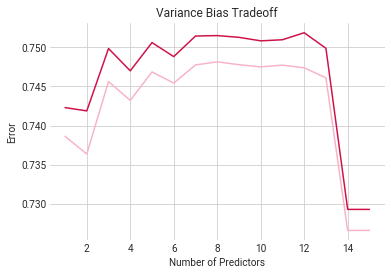

In [90]:
df = pd.DataFrame(columns =[ 'Number of Variable', 'Train Accuracy','Test Accuracy'])
for i in range(0,15):

    var = forward_stepwise.loc[i,"Predictors"]

    x_train = X_train[var]
    x_test  = X_test[var]
    
    log_model = sm.Logit(endog = y_train, exog = x_train).fit(maxiter = 10000)
    y_test_pred_proba = log_model.predict(x_test)
    y_train_pred_proba = log_model.predict(x_train)

    # model evaluation
    print("Predictors:{}".format(str(var)))
    test_acc, test_spe ,test_sen, cm  = evaluation_score(y_test, y_test_pred_proba, thresh = 0.15)
    train_acc, train_spe ,train_sen, cm  = evaluation_score(y_train, y_train_pred_proba, thresh = 0.15)

    n = i+1  
    df = df.append({'Number of Variable':n, 'Train Accuracy':train_acc,'Test Accuracy':test_acc},ignore_index = True)

# plotting the variance and bias trade off
plt.plot(df['Number of Variable'], df['Test Accuracy'], label='Bias',color = '#F8B4C7')
plt.plot(df['Number of Variable'], df['Train Accuracy'], label='Variance',color = '#CF1248')
plt.xlabel('Number of Predictors')
plt.ylabel('Error')
plt.title('Variance Bias Tradeoff')


plt.savefig("no_var_AUC.png", dpi = 300, transparent = True)

In [88]:
df

,Number of Variable,Train Accuracy,Test Accuracy
0,1.0,0.867480,0.869713
1,2.0,0.841210,0.842941
2,3.0,0.849195,0.850311
3,4.0,0.848190,0.850702
4,5.0,0.847687,0.850339
5,6.0,0.846096,0.848162
6,7.0,0.846124,0.848748
7,8.0,0.846152,0.848971
8,9.0,0.846263,0.848748
9,10.0,0.846375,0.848804


In [13]:
best_var = forward_stepwise.loc[forward_stepwise['AUC'].idxmax()]["Predictors"]
best_var

['DP03_0088E',
 'DP03_0119PE',
 'P001008PE',
 'P001006PE',
 'H004002PE',
 'P001009PE',
 'H004004PE',
 'DP03_0006PE',
 'DP03_UNEMPLOY']

### Best multivariable Logistic Regression Model
Using the 9-variables model as a base model, we then attempt to find the threshold to optimise the prediction power

In [67]:
var = forward_stepwise.loc[8,"Predictors"]

x_train = X_train[var]
x_test  = X_test[var]

log_model = sm.Logit(endog = y_train, exog = x_train).fit(maxiter = 10000)
y_pred_proba = log_model.predict(x_test)

log_model_acc,log_model_spe ,log_model_sen, cm  = evaluation_score(y_test, y_pred_proba, thresh =0.19)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# tuning for the best threshold
threshold = pd.DataFrame({'thresh':thresholds,'fpr':fpr, "tpr":tpr})


Optimization terminated successfully.
         Current function value: 0.318004
         Iterations 8
Accuracy:0.80, Specifity:0.84 ,Sensitivity:0.50


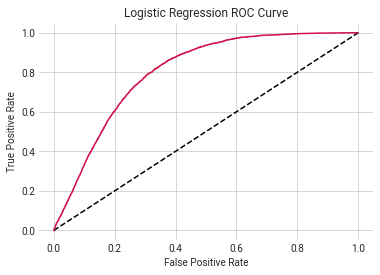

In [68]:
# plotting the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression',color = '#CF1248')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

plt.savefig("multi_log.png", dpi = 300, transparent = True)

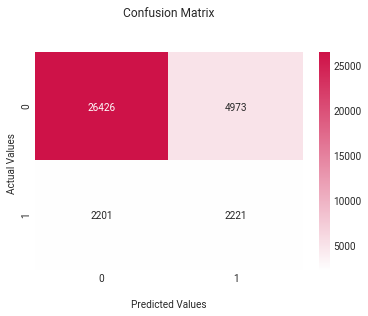

In [69]:
ax = sns.heatmap(cm, annot=True, fmt='.0f',cmap=get_continuous_cmap(["#FFFFFF","#CF1248"]))

ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

plt.savefig('lr_heatmat.png',dpi = 300, transparent = True, bbox_inches='tight')


#### Increasing the dimension of the dataframe

In [75]:
subset = df[['DP03_0088E','P001004PE','H004004PE']]
subset['Int_DP88xP04'] = subset['DP03_0088E']*subset['P001004PE']

<ipython-input-75-0a29e006ffd7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Int_DP88xP04'] = subset['DP03_0088E']*subset['P001004PE']


Optimization terminated successfully.
         Current function value: 0.323794
         Iterations 7
Accuracy:0.79, Specifity:0.84 ,Sensitivity:0.42
0.7785048451173858


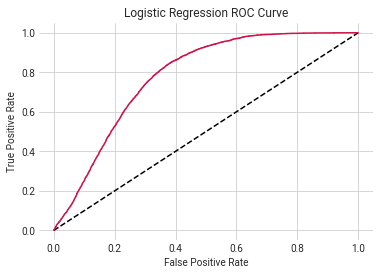

In [77]:
subX_train, subX_test, y_train, y_test = train_test_split(subset,y,test_size = 0.5, random_state=42)

log_model = sm.Logit(endog = y_train, exog = subX_train).fit(maxiter = 10000)
y_pred_proba = log_model.predict(subX_test)

log_model_acc,log_model_spe ,log_model_sen, cm  = evaluation_score(y_test, y_pred_proba, thresh =0.2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# plotting the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression',color = '#CF1248')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

plt.savefig("int_logmod.png", dpi = 300, transparent = True)

print(metrics.auc(fpr, tpr))

### Applying for regularization

In [18]:
# lasso
# LogisticRegression(penalty = 'l1')
# ridge
# LogisticRegression(penalty = 'l2')

# regularization, minisming the magintude of coefficient
# LogisticRegression(C=1 #default value)
# without regularization: C =10^8
